## Panorama 

**Panorama** là một kĩ thuật xử lí ảnh, là một trong những ứng dụng thành công nhất trong lĩnh vực Thị giác Máy tính. Hầu hết các điện thọai thông minh đều có tính năng này. 

Chúng ta sẽ cùng tìm hiểu về kĩ thuật này và cách xây dựng nó bằng thư viện OpenCV và các thư viện bổ trợ khác.

**Một số kĩ thuật khác liên quan:**
* Keypoint detection
* Local invariant descriptors (SIFT, SURF, etc)
* Feature matching
* Homography estimation using RANSAC
* Perspective warping

Nhiệm vụ của chúng ta là tìm cách stitching (ghép) hai bức ảnh lại với nhau thành một bức ảnh lớn hơn mang bối cảnh của cả hai. Điều quan tâm ở đây là hai bức ảnh sẽ có những khu vực chung, chúng ta sẽ tìm những điểm ảnh thể hiện các khu vực đó.

In [5]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

### Keypoints Detection

Sử dụng các phương pháp SIFT, SUF hoặc ORB nhằm trích xuất các điểm chính (keypoints) từ cả hai hình ảnh, sử dụng hàm DetAndCompute(). Ảnh sẽ được chuyển về ảnh xám để tính toán.

In [4]:
def detectAndDescribe(image, method=None):
    """
    Compute key points and feature descriptors using an specific method
    """
    
    assert method is not None, "You need to define a feature detection method. Values are: 'sift', 'surf'"
    
    # detect and extract features from the image
    if method == 'sift':
        descriptor = cv2.xfeatures2d.SIFT_create()
    elif method == 'surf':
        descriptor = cv2.xfeatures2d.SURF_create()
    elif method == 'brisk':
        descriptor = cv2.BRISK_create()
    elif method == 'orb':
        descriptor = cv2.ORB_create()
        
    # get keypoints and descriptors
    (kps, features) = descriptor.detectAndCompute(image, None)
    
    return (kps, features)

In [17]:
imgA = cv2.imread('images/training.jpg')
grayA = cv2.cvtColor(imgA, cv2.COLOR_RGB2GRAY)

imgB = cv2.imread('images/query.jpg')
grayB = cv2.cvtColor(imgB, cv2.COLOR_RGB2GRAY)

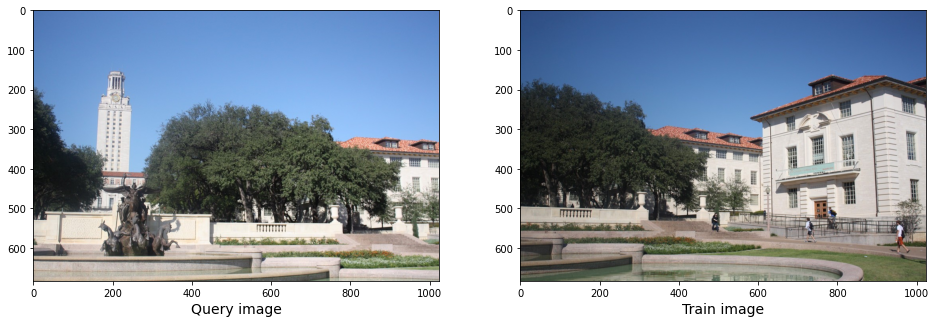

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))
ax1.imshow(imgB[:,:,::-1], cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(imgA[:,:,::-1], cmap="gray")
ax2.set_xlabel("Train image", fontsize=14)

plt.show()

In [24]:
kpsA, ftsA = detectAndDescribe(grayA, method='orb')
kpsB, ftsB = detectAndDescribe(grayB, method='orb')

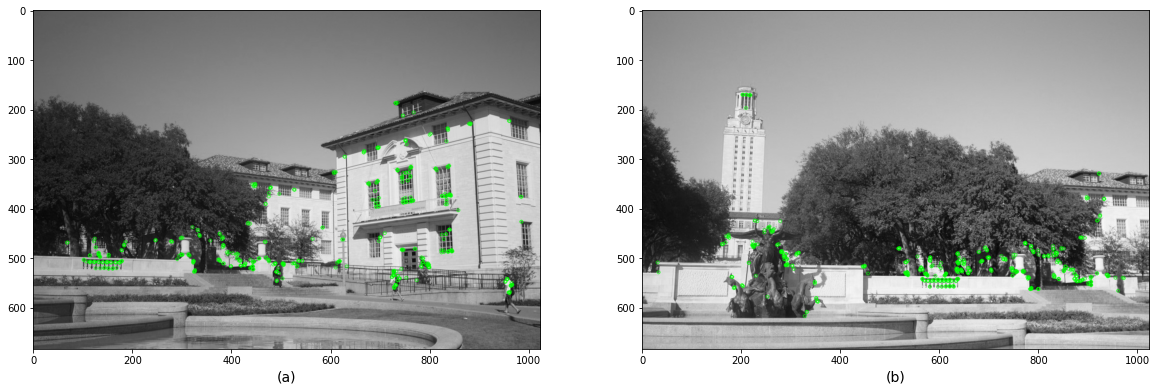

In [25]:
# display the keypoints and features detected on both images
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.imshow(cv2.drawKeypoints(grayA,kpsA,None,color=(0,255,0)))
ax1.set_xlabel("(a)", fontsize=14)
ax2.imshow(cv2.drawKeypoints(grayB,kpsB,None,color=(0,255,0)))
ax2.set_xlabel("(b)", fontsize=14)

plt.show()

### Feature Matching


Sau khi đã có các bộ keypoints từ hai hình ảnh, chúng ta tiến hành tìm các keypoints là khớp nhau giữa hai hình ảnh. 

Với OpenCV sẽ có hai hướng để giải quyết vấn đề này:
* Brute Force Matcher
* KNN (k-Nearest Neighbors)

Với BruteForce, cho 2 bộ đặc trưng (ảnh traning và ảnh query), mỗi đặc trưng của anh traning sẽ được so khớp với tất cả đặc trưng của anh query, trả về đặc trưng gần nhất của ảnh query hoặc ngược lại. Cách tính các đặc trưng là khớp nhau bằng cách sử dụng công thức tính khoảng cách Euclid giữa hai điểm. 

In [27]:
def createMatcher(method,crossCheck):
    "Create and return a Matcher Object"
    
    if method == 'sift' or method == 'surf':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=crossCheck)
    elif method == 'orb' or method == 'brisk':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=crossCheck)
    return bf

Tham số crossCheck cho biết hai đặc trưng có phải khớp nhau là hợp lệ hay không. 

**Tham khảo**: [Image Panorama Stitching with OpenCV](https://towardsdatascience.com/image-panorama-stitching-with-opencv-2402bde6b46c)